# Introduction

This notebook contains two parts. **Part 1, Testing Perceptrons**, provides you an opportunity to demonstrate your ability to apply course concepts by implementing a test function for a perceptron. **Part 2, Mine Detection**, provides you an opportunity to practice using widely-used ML libraries and an ML workflow to solve a classification problem.

You do not need to complete Part 1 in order to complete Part 2. If you get stuck on Part 1, and choose to work on Part 2, be sure that all of your code for Part 1 runs without error. You can comment out your code in Part 1 if necessary.

# Part 1: Testing Perceptrons

Given a simple Perceptron classifier, and a test set cancer diagnoses, demonstrate your ability to implement a perceptron's `test` function, such that it returns the accuracy of its predictions for the class labels of samples in a training set.

## The Perceptron Implementation

Let's first introduce the classifier, which you should find familiar, and you do not need to modify. Notice that the `test` method is stubbed.

In [1]:
import random

class Perceptron:

    def __init__(self, alpha = 0.1, max_epochs = 1000):
        self.alpha = alpha
        self.max_epochs = max_epochs

    def train(self, training_set):
        self.weights = self._initial_weights(len(training_set[0]))
        for i in range(self.max_epochs):
            correct_classifications = 0
            for record in training_set:
                y = record[0]
                y_hat = self.predict(record[1:])
                if y == y_hat: correct_classifications += 1
                self._update_weights(y - y_hat, [1] + record[1:])
            if correct_classifications / len(training_set) == 1.0:
                print(f"Epoch {i} Accuracy: {correct_classifications / len(training_set)}")
                break

    def predict(self, features):
        return self._sign_of(self._dot_product(self.weights, [1] + features))

    def test(self, test_set):
        pass

    def _update_weights(self, error, features):
        self.weights[0] += self.alpha * error
        for i in range(1, len(self.weights)):
            self.weights[i] += self.alpha * error * features[i]

    def _dot_product(self, w, x):
        return sum([w * x for w, x in zip(w, x)])

    def _sign_of(self, value):
        return 1 if value >= 0 else -1

    def _initial_weights(self, length):
        return [random.uniform(0, 1) for _ in range(length)]

## The Data Set

There is no need for you to manually load the data set. We have provided a subset of the cancer diagnoses data set here, already split into a training set, `diagnoses_training`, and a test set, `diagnoses_test`. Each data set is a simple, two-dimensional Python list, where each sub-list represents the attributes for one diagnosis.

We have preprocessed the data, such that the **first dimension is the class label**: a `1` indicating malignant, and `-1` indicating benign.


In [2]:
diagnoses_training = [
    [1, 17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
    [1, 20.57, 17.77, 132.9, 1326, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902],
    [1, 19.69, 21.25, 130, 1203, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758],
    [1, 11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.2575, 0.6638, 0.173],
    [1, 20.29, 14.34, 135.1, 1297, 0.1003, 0.1328, 0.198, 0.1043, 0.1809, 0.05883, 0.7572, 0.7813, 5.438, 94.44, 0.01149, 0.02461, 0.05688, 0.01885, 0.01756, 0.005115, 22.54, 16.67, 152.2, 1575, 0.1374, 0.205, 0.4, 0.1625, 0.2364, 0.07678],
    [1, 12.45, 15.7, 82.57, 477.1, 0.1278, 0.17, 0.1578, 0.08089, 0.2087, 0.07613, 0.3345, 0.8902, 2.217, 27.19, 0.00751, 0.03345, 0.03672, 0.01137, 0.02165, 0.005082, 15.47, 23.75, 103.4, 741.6, 0.1791, 0.5249, 0.5355, 0.1741, 0.3985, 0.1244],
    [1, 18.25, 19.98, 119.6, 1040, 0.09463, 0.109, 0.1127, 0.074, 0.1794, 0.05742, 0.4467, 0.7732, 3.18, 53.91, 0.004314, 0.01382, 0.02254, 0.01039, 0.01369, 0.002179, 22.88, 27.66, 153.2, 1606, 0.1442, 0.2576, 0.3784, 0.1932, 0.3063, 0.08368],
    [1, 13.71, 20.83, 90.2, 577.9, 0.1189, 0.1645, 0.09366, 0.05985, 0.2196, 0.07451, 0.5835, 1.377, 3.856, 50.96, 0.008805, 0.03029, 0.02488, 0.01448, 0.01486, 0.005412, 17.06, 28.14, 110.6, 897, 0.1654, 0.3682, 0.2678, 0.1556, 0.3196, 0.1151],
    [1, 13, 21.82, 87.5, 519.8, 0.1273, 0.1932, 0.1859, 0.09353, 0.235, 0.07389, 0.3063, 1.002, 2.406, 24.32, 0.005731, 0.03502, 0.03553, 0.01226, 0.02143, 0.003749, 15.49, 30.73, 106.2, 739.3, 0.1703, 0.5401, 0.539, 0.206, 0.4378, 0.1072],
    [1, 12.46, 24.04, 83.97, 475.9, 0.1186, 0.2396, 0.2273, 0.08543, 0.203, 0.08243, 0.2976, 1.599, 2.039, 23.94, 0.007149, 0.07217, 0.07743, 0.01432, 0.01789, 0.01008, 15.09, 40.68, 97.65, 711.4, 0.1853, 1.058, 1.105, 0.221, 0.4366, 0.2075],
    [1, 16.02, 23.24, 102.7, 797.8, 0.08206, 0.06669, 0.03299, 0.03323, 0.1528, 0.05697, 0.3795, 1.187, 2.466, 40.51, 0.004029, 0.009269, 0.01101, 0.007591, 0.0146, 0.003042, 19.19, 33.88, 123.8, 1150, 0.1181, 0.1551, 0.1459, 0.09975, 0.2948, 0.08452],
    [1, 15.78, 17.89, 103.6, 781, 0.0971, 0.1292, 0.09954, 0.06606, 0.1842, 0.06082, 0.5058, 0.9849, 3.564, 54.16, 0.005771, 0.04061, 0.02791, 0.01282, 0.02008, 0.004144, 20.42, 27.28, 136.5, 1299, 0.1396, 0.5609, 0.3965, 0.181, 0.3792, 0.1048],
    [1, 19.17, 24.8, 132.4, 1123, 0.0974, 0.2458, 0.2065, 0.1118, 0.2397, 0.078, 0.9555, 3.568, 11.07, 116.2, 0.003139, 0.08297, 0.0889, 0.0409, 0.04484, 0.01284, 20.96, 29.94, 151.7, 1332, 0.1037, 0.3903, 0.3639, 0.1767, 0.3176, 0.1023],
    [1, 15.85, 23.95, 103.7, 782.7, 0.08401, 0.1002, 0.09938, 0.05364, 0.1847, 0.05338, 0.4033, 1.078, 2.903, 36.58, 0.009769, 0.03126, 0.05051, 0.01992, 0.02981, 0.003002, 16.84, 27.66, 112, 876.5, 0.1131, 0.1924, 0.2322, 0.1119, 0.2809, 0.06287],
    [1, 13.73, 22.61, 93.6, 578.3, 0.1131, 0.2293, 0.2128, 0.08025, 0.2069, 0.07682, 0.2121, 1.169, 2.061, 19.21, 0.006429, 0.05936, 0.05501, 0.01628, 0.01961, 0.008093, 15.03, 32.01, 108.8, 697.7, 0.1651, 0.7725, 0.6943, 0.2208, 0.3596, 0.1431],
    [1, 14.54, 27.54, 96.73, 658.8, 0.1139, 0.1595, 0.1639, 0.07364, 0.2303, 0.07077, 0.37, 1.033, 2.879, 32.55, 0.005607, 0.0424, 0.04741, 0.0109, 0.01857, 0.005466, 17.46, 37.13, 124.1, 943.2, 0.1678, 0.6577, 0.7026, 0.1712, 0.4218, 0.1341],
    [1, 14.68, 20.13, 94.74, 684.5, 0.09867, 0.072, 0.07395, 0.05259, 0.1586, 0.05922, 0.4727, 1.24, 3.195, 45.4, 0.005718, 0.01162, 0.01998, 0.01109, 0.0141, 0.002085, 19.07, 30.88, 123.4, 1138, 0.1464, 0.1871, 0.2914, 0.1609, 0.3029, 0.08216],
    [1, 16.13, 20.68, 108.1, 798.8, 0.117, 0.2022, 0.1722, 0.1028, 0.2164, 0.07356, 0.5692, 1.073, 3.854, 54.18, 0.007026, 0.02501, 0.03188, 0.01297, 0.01689, 0.004142, 20.96, 31.48, 136.8, 1315, 0.1789, 0.4233, 0.4784, 0.2073, 0.3706, 0.1142],
    [1, 19.81, 22.15, 130, 1260, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615],
    [-1, 13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259],
    [-1, 13.08, 15.71, 85.63, 520, 0.1075, 0.127, 0.04568, 0.0311, 0.1967, 0.06811, 0.1852, 0.7477, 1.383, 14.67, 0.004097, 0.01898, 0.01698, 0.00649, 0.01678, 0.002425, 14.5, 20.49, 96.09, 630.5, 0.1312, 0.2776, 0.189, 0.07283, 0.3184, 0.08183],
    [-1, 9.504, 12.44, 60.34, 273.9, 0.1024, 0.06492, 0.02956, 0.02076, 0.1815, 0.06905, 0.2773, 0.9768, 1.909, 15.7, 0.009606, 0.01432, 0.01985, 0.01421, 0.02027, 0.002968, 10.23, 15.66, 65.13, 314.9, 0.1324, 0.1148, 0.08867, 0.06227, 0.245, 0.07773],
    [1, 15.34, 14.26, 102.5, 704.4, 0.1073, 0.2135, 0.2077, 0.09756, 0.2521, 0.07032, 0.4388, 0.7096, 3.384, 44.91, 0.006789, 0.05328, 0.06446, 0.02252, 0.03672, 0.004394, 18.07, 19.08, 125.1, 980.9, 0.139, 0.5954, 0.6305, 0.2393, 0.4667, 0.09946],
    [1, 21.16, 23.04, 137.2, 1404, 0.09428, 0.1022, 0.1097, 0.08632, 0.1769, 0.05278, 0.6917, 1.127, 4.303, 93.99, 0.004728, 0.01259, 0.01715, 0.01038, 0.01083, 0.001987, 29.17, 35.59, 188, 2615, 0.1401, 0.26, 0.3155, 0.2009, 0.2822, 0.07526],
    [1, 16.65, 21.38, 110, 904.6, 0.1121, 0.1457, 0.1525, 0.0917, 0.1995, 0.0633, 0.8068, 0.9017, 5.455, 102.6, 0.006048, 0.01882, 0.02741, 0.0113, 0.01468, 0.002801, 26.46, 31.56, 177, 2215, 0.1805, 0.3578, 0.4695, 0.2095, 0.3613, 0.09564],
    [1, 17.14, 16.4, 116, 912.7, 0.1186, 0.2276, 0.2229, 0.1401, 0.304, 0.07413, 1.046, 0.976, 7.276, 111.4, 0.008029, 0.03799, 0.03732, 0.02397, 0.02308, 0.007444, 22.25, 21.4, 152.4, 1461, 0.1545, 0.3949, 0.3853, 0.255, 0.4066, 0.1059],
    [1, 14.58, 21.53, 97.41, 644.8, 0.1054, 0.1868, 0.1425, 0.08783, 0.2252, 0.06924, 0.2545, 0.9832, 2.11, 21.05, 0.004452, 0.03055, 0.02681, 0.01352, 0.01454, 0.003711, 17.62, 33.21, 122.4, 896.9, 0.1525, 0.6643, 0.5539, 0.2701, 0.4264, 0.1275],
    [1, 18.61, 20.25, 122.1, 1094, 0.0944, 0.1066, 0.149, 0.07731, 0.1697, 0.05699, 0.8529, 1.849, 5.632, 93.54, 0.01075, 0.02722, 0.05081, 0.01911, 0.02293, 0.004217, 21.31, 27.26, 139.9, 1403, 0.1338, 0.2117, 0.3446, 0.149, 0.2341, 0.07421],
    [1, 15.3, 25.27, 102.4, 732.4, 0.1082, 0.1697, 0.1683, 0.08751, 0.1926, 0.0654, 0.439, 1.012, 3.498, 43.5, 0.005233, 0.03057, 0.03576, 0.01083, 0.01768, 0.002967, 20.27, 36.71, 149.3, 1269, 0.1641, 0.611, 0.6335, 0.2024, 0.4027, 0.09876],
    [1, 17.57, 15.05, 115, 955.1, 0.09847, 0.1157, 0.09875, 0.07953, 0.1739, 0.06149, 0.6003, 0.8225, 4.655, 61.1, 0.005627, 0.03033, 0.03407, 0.01354, 0.01925, 0.003742, 20.01, 19.52, 134.9, 1227, 0.1255, 0.2812, 0.2489, 0.1456, 0.2756, 0.07919],
    [1, 18.63, 25.11, 124.8, 1088, 0.1064, 0.1887, 0.2319, 0.1244, 0.2183, 0.06197, 0.8307, 1.466, 5.574, 105, 0.006248, 0.03374, 0.05196, 0.01158, 0.02007, 0.00456, 23.15, 34.01, 160.5, 1670, 0.1491, 0.4257, 0.6133, 0.1848, 0.3444, 0.09782],
    [1, 11.84, 18.7, 77.93, 440.6, 0.1109, 0.1516, 0.1218, 0.05182, 0.2301, 0.07799, 0.4825, 1.03, 3.475, 41, 0.005551, 0.03414, 0.04205, 0.01044, 0.02273, 0.005667, 16.82, 28.12, 119.4, 888.7, 0.1637, 0.5775, 0.6956, 0.1546, 0.4761, 0.1402],
    [1, 17.02, 23.98, 112.8, 899.3, 0.1197, 0.1496, 0.2417, 0.1203, 0.2248, 0.06382, 0.6009, 1.398, 3.999, 67.78, 0.008268, 0.03082, 0.05042, 0.01112, 0.02102, 0.003854, 20.88, 32.09, 136.1, 1344, 0.1634, 0.3559, 0.5588, 0.1847, 0.353, 0.08482],
    [1, 19.27, 26.47, 127.9, 1162, 0.09401, 0.1719, 0.1657, 0.07593, 0.1853, 0.06261, 0.5558, 0.6062, 3.528, 68.17, 0.005015, 0.03318, 0.03497, 0.009643, 0.01543, 0.003896, 24.15, 30.9, 161.4, 1813, 0.1509, 0.659, 0.6091, 0.1785, 0.3672, 0.1123],
    [1, 16.13, 17.88, 107, 807.2, 0.104, 0.1559, 0.1354, 0.07752, 0.1998, 0.06515, 0.334, 0.6857, 2.183, 35.03, 0.004185, 0.02868, 0.02664, 0.009067, 0.01703, 0.003817, 20.21, 27.26, 132.7, 1261, 0.1446, 0.5804, 0.5274, 0.1864, 0.427, 0.1233],
    [1, 16.74, 21.59, 110.1, 869.5, 0.0961, 0.1336, 0.1348, 0.06018, 0.1896, 0.05656, 0.4615, 0.9197, 3.008, 45.19, 0.005776, 0.02499, 0.03695, 0.01195, 0.02789, 0.002665, 20.01, 29.02, 133.5, 1229, 0.1563, 0.3835, 0.5409, 0.1813, 0.4863, 0.08633],
    [1, 14.25, 21.72, 93.63, 633, 0.09823, 0.1098, 0.1319, 0.05598, 0.1885, 0.06125, 0.286, 1.019, 2.657, 24.91, 0.005878, 0.02995, 0.04815, 0.01161, 0.02028, 0.004022, 15.89, 30.36, 116.2, 799.6, 0.1446, 0.4238, 0.5186, 0.1447, 0.3591, 0.1014],
    [-1, 13.03, 18.42, 82.61, 523.8, 0.08983, 0.03766, 0.02562, 0.02923, 0.1467, 0.05863, 0.1839, 2.342, 1.17, 14.16, 0.004352, 0.004899, 0.01343, 0.01164, 0.02671, 0.001777, 13.3, 22.81, 84.46, 545.9, 0.09701, 0.04619, 0.04833, 0.05013, 0.1987, 0.06169],
    [1, 14.99, 25.2, 95.54, 698.8, 0.09387, 0.05131, 0.02398, 0.02899, 0.1565, 0.05504, 1.214, 2.188, 8.077, 106, 0.006883, 0.01094, 0.01818, 0.01917, 0.007882, 0.001754, 14.99, 25.2, 95.54, 698.8, 0.09387, 0.05131, 0.02398, 0.02899, 0.1565, 0.05504],
    [1, 13.48, 20.82, 88.4, 559.2, 0.1016, 0.1255, 0.1063, 0.05439, 0.172, 0.06419, 0.213, 0.5914, 1.545, 18.52, 0.005367, 0.02239, 0.03049, 0.01262, 0.01377, 0.003187, 15.53, 26.02, 107.3, 740.4, 0.161, 0.4225, 0.503, 0.2258, 0.2807, 0.1071],
    [1, 13.44, 21.58, 86.18, 563, 0.08162, 0.06031, 0.0311, 0.02031, 0.1784, 0.05587, 0.2385, 0.8265, 1.572, 20.53, 0.00328, 0.01102, 0.0139, 0.006881, 0.0138, 0.001286, 15.93, 30.25, 102.5, 787.9, 0.1094, 0.2043, 0.2085, 0.1112, 0.2994, 0.07146],
    [1, 10.95, 21.35, 71.9, 371.1, 0.1227, 0.1218, 0.1044, 0.05669, 0.1895, 0.0687, 0.2366, 1.428, 1.822, 16.97, 0.008064, 0.01764, 0.02595, 0.01037, 0.01357, 0.00304, 12.84, 35.34, 87.22, 514, 0.1909, 0.2698, 0.4023, 0.1424, 0.2964, 0.09606],
    [1, 19.07, 24.81, 128.3, 1104, 0.09081, 0.219, 0.2107, 0.09961, 0.231, 0.06343, 0.9811, 1.666, 8.83, 104.9, 0.006548, 0.1006, 0.09723, 0.02638, 0.05333, 0.007646, 24.09, 33.17, 177.4, 1651, 0.1247, 0.7444, 0.7242, 0.2493, 0.467, 0.1038],
    [1, 13.28, 20.28, 87.32, 545.2, 0.1041, 0.1436, 0.09847, 0.06158, 0.1974, 0.06782, 0.3704, 0.8249, 2.427, 31.33, 0.005072, 0.02147, 0.02185, 0.00956, 0.01719, 0.003317, 17.38, 28, 113.1, 907.2, 0.153, 0.3724, 0.3664, 0.1492, 0.3739, 0.1027],
    [1, 13.17, 21.81, 85.42, 531.5, 0.09714, 0.1047, 0.08259, 0.05252, 0.1746, 0.06177, 0.1938, 0.6123, 1.334, 14.49, 0.00335, 0.01384, 0.01452, 0.006853, 0.01113, 0.00172, 16.23, 29.89, 105.5, 740.7, 0.1503, 0.3904, 0.3728, 0.1607, 0.3693, 0.09618],
    [1, 18.65, 17.6, 123.7, 1076, 0.1099, 0.1686, 0.1974, 0.1009, 0.1907, 0.06049, 0.6289, 0.6633, 4.293, 71.56, 0.006294, 0.03994, 0.05554, 0.01695, 0.02428, 0.003535, 22.82, 21.32, 150.6, 1567, 0.1679, 0.509, 0.7345, 0.2378, 0.3799, 0.09185],
    [-1, 8.196, 16.84, 51.71, 201.9, 0.086, 0.05943, 0.01588, 0.005917, 0.1769, 0.06503, 0.1563, 0.9567, 1.094, 8.205, 0.008968, 0.01646, 0.01588, 0.005917, 0.02574, 0.002582, 8.964, 21.96, 57.26, 242.2, 0.1297, 0.1357, 0.0688, 0.02564, 0.3105, 0.07409]
]

diagnoses_test = [
    [-1, 8.95, 15.76, 58.74, 245.2, 0.09462, 0.1243, 0.09263, 0.02308, 0.1305, 0.07163, 0.3132, 0.9789, 3.28, 16.94, 0.01835, 0.0676, 0.09263, 0.02308, 0.02384, 0.005601, 9.414, 17.07, 63.34, 270, 0.1179, 0.1879, 0.1544, 0.03846, 0.1652, 0.07722],
    [1, 15.22, 30.62, 103.4, 716.9, 0.1048, 0.2087, 0.255, 0.09429, 0.2128, 0.07152, 0.2602, 1.205, 2.362, 22.65, 0.004625, 0.04844, 0.07359, 0.01608, 0.02137, 0.006142, 17.52, 42.79, 128.7, 915, 0.1417, 0.7917, 1.17, 0.2356, 0.4089, 0.1409],
    [-1, 11.34, 21.26, 72.48, 396.5, 0.08759, 0.06575, 0.05133, 0.01899, 0.1487, 0.06529, 0.2344, 0.9861, 1.597, 16.41, 0.009113, 0.01557, 0.02443, 0.006435, 0.01568, 0.002477, 13.01, 29.15, 83.99, 518.1, 0.1699, 0.2196, 0.312, 0.08278, 0.2829, 0.08832],
    [1, 20.92, 25.09, 143, 1347, 0.1099, 0.2236, 0.3174, 0.1474, 0.2149, 0.06879, 0.9622, 1.026, 8.758, 118.8, 0.006399, 0.0431, 0.07845, 0.02624, 0.02057, 0.006213, 24.29, 29.41, 179.1, 1819, 0.1407, 0.4186, 0.6599, 0.2542, 0.2929, 0.09873],
    [-1, 12.36, 18.54, 79.01, 466.7, 0.08477, 0.06815, 0.02643, 0.01921, 0.1602, 0.06066, 0.1199, 0.8944, 0.8484, 9.227, 0.003457, 0.01047, 0.01167, 0.005558, 0.01251, 0.001356, 13.29, 27.49, 85.56, 544.1, 0.1184, 0.1963, 0.1937, 0.08442, 0.2983, 0.07185],
    [1, 21.56, 22.39, 142, 1479, 0.111, 0.1159, 0.2439, 0.1389, 0.1726, 0.05623, 1.176, 1.256, 7.673, 158.7, 0.0103, 0.02891, 0.05198, 0.02454, 0.01114, 0.004239, 25.45, 26.4, 166.1, 2027, 0.141, 0.2113, 0.4107, 0.2216, 0.206, 0.07115],
    [-1, 9.777, 16.99, 62.5, 290.2, 0.1037, 0.08404, 0.04334, 0.01778, 0.1584, 0.07065, 0.403, 1.424, 2.747, 22.87, 0.01385, 0.02932, 0.02722, 0.01023, 0.03281, 0.004638, 11.05, 21.47, 71.68, 367, 0.1467, 0.1765, 0.13, 0.05334, 0.2533, 0.08468],
    [1, 20.13, 28.25, 131.2, 1261, 0.0978, 0.1034, 0.144, 0.09791, 0.1752, 0.05533, 0.7655, 2.463, 5.203, 99.04, 0.005769, 0.02423, 0.0395, 0.01678, 0.01898, 0.002498, 23.69, 38.25, 155, 1731, 0.1166, 0.1922, 0.3215, 0.1628, 0.2572, 0.06637],
    [-1, 12.63, 20.76, 82.15, 480.4, 0.09933, 0.1209, 0.1065, 0.06021, 0.1735, 0.0707, 0.3424, 1.803, 2.711, 20.48, 0.01291, 0.04042, 0.05101, 0.02295, 0.02144, 0.005891, 13.33, 25.47, 89, 527.4, 0.1287, 0.225, 0.2216, 0.1105, 0.2226, 0.08486],
    [1, 16.6, 28.08, 108.3, 858.1, 0.08455, 0.1023, 0.09251, 0.05302, 0.159, 0.05648, 0.4564, 1.075, 3.425, 48.55, 0.005903, 0.03731, 0.0473, 0.01557, 0.01318, 0.003892, 18.98, 34.12, 126.7, 1124, 0.1139, 0.3094, 0.3403, 0.1418, 0.2218, 0.0782],
    [-1, 14.26, 19.65, 97.83, 629.9, 0.07837, 0.2233, 0.3003, 0.07798, 0.1704, 0.07769, 0.3628, 1.49, 3.399, 29.25, 0.005298, 0.07446, 0.1435, 0.02292, 0.02566, 0.01298, 15.3, 23.73, 107, 709, 0.08949, 0.4193, 0, 0.1503, 0.07247, 0.2438, 0.08541],
    [1, 20.6, 29.33, 140.1, 1265, 0.1178, 0.277, 0.3514, 0.152, 0.2397, 0.07016, 0.726, 1.595, 5.772, 86.22, 0.006522, 0.06158, 0.07117, 0.01664, 0.02324, 0.006185, 25.74, 39.42, 184.6, 1821, 0.165, 0.8681, 0.9387, 0.265, 0.4087, 0.124]
]


## What to Do
 
Demonstrate your understanding and ability to have synthesized course concepts by implementing a `test` function for the perceptron. Your goal is to implement the `test` function, stubbed for you below, in the subclass `TestablePerceptron`. The `test` function should return the accuracy rate of the perceptron's prediction, given `diagnoses_test`. In the end, your work should reflect the principles seen thus far in the course.

Please be sure to demonstrate:

1. Your implementation, as code, in the subclass below.
2. Using your test function, which is already done for you, following the class definition.

## Tips

- Be sure that you have spent time with the Exploration materials in this course.
- Ask questions on the course forum if you get stuck (describe what you are trying to do, and errors that you encounter)
- Keep it simple. This is quite straightforward.
- Be sure to run the code cell containing your TestablePerceptron class and the code cell that invokes the `test` method, or use the *>> Run All* button.

## Begin Your Implementation Here

In the code cell below, implement the `test` function by replacing `pass` with your code. It should accept a training set as input, and *return* a number representing the accuracy of the perceptron based on predictions made with the test set.

## Implement Test Function

In [3]:
class TestablePerceptron(Perceptron):
    
    def test(self, test_set):
        num_correct = 0
        for record in test_set:
            y = record[0]
            y_hat = self.predict(record[1:])
            # Compare y with predit value Y_hat to calculate the model accuracy
            if y == y_hat:
                num_correct += 1
        accuracy = num_correct / len(test_set)
        print(f"Test accuracy: {accuracy}")
        return accuracy

Your TestablePerceptron should result in the following code, which trains and tests a TestablePerceptron, running without error. You do not need to modify the code below, but once your `test` method above is complete, you should see the accuracy of the test printed, instead of `None`.

## Print accuracy result

In [4]:

perceptron = TestablePerceptron(alpha = 0.01, max_epochs = 10000)
accuracy = perceptron.train(diagnoses_training)
test_accuracy = perceptron.test(diagnoses_test)
test_error = 1 - test_accuracy
print(f"Train accuracy: {accuracy}")
print(f"Test accuracy: {test_accuracy}")
print(f"Test error: {test_error}")

Epoch 4618 Accuracy: 1.0
Test accuracy: 0.9166666666666666
Train accuracy: None
Test accuracy: 0.9166666666666666
Test error: 0.08333333333333337


## Conclusion of Part 1

Write a few sentences here that describes what your `test` function does in "plain English." Try expressing this accurately and authentically *without* giving us a line-by-line summary of what your function does (we can read the code for that). Tell us what the test error is. Then, describe how many learning epochs it took for the perceptron to achive 100% accuracy during *training*, and explain why that number changes each time you run the code cell above.


In the test function, it compare all the the predict result with the actual result. Then count the the number of the correct result divived by the total number of the result to calculate the accuracy rate. The number of epoches I run the achive 100% is 4998. The test accuracy is 0.91666 and the test error is 0.08333. The result are different for few resaons:

1) First, the initial weights of the perceptron are randomly generated at the start of each training process. The weight values is a list of random numbers between 0 to 1. This means that each time the code is run, the perceptron will start with different weights, and this can lead to different convergence rates.

2) Second, the order of the training data can impact the learning process of the perceptron. The training data is fed to the perceptron one record at a time, the weight get updated each record. If the training data is presented in a random order, the convergence rate may vary between runs.

3) Third, alpha may have impact on the result. alpha = 0.01 is a parameter that controls the learning rate of the perceptron during the training process. alpha control how quickly the weight get updated. A higher value of alpha results in larger updates to the weights, while a lower value results in smaller updates.

# Part 2: Mine Detection

In this, the second, part of this notebook, you will build a classifier that can predict whether or not a sonar signature is from a mine or a rock. We'll use a version of the [sonar data set](https://www.openml.org/search?type=data&sort=runs&id=40&status=active) by Gorman and Sejnowski. Take a moment now to [familiarize yourself with the subject matter of this data set](https://datahub.io/machine-learning/sonar%23resource-sonar), and look at the details of the version of this data set, [Mines vs Rocks, hosted on Kaggle](https://www.kaggle.com/datasets/mattcarter865/mines-vs-rocks).

Unlike previous notebooks, where we provide code for each step of the ML process, this notebook expects each student to implement the ML workflow steps. We will get you started by providing the first step, loading the data, and providing some landmarks below. Your process should demonstrate:

1. Loading the data
2. Exploring the data
3. Preprocessing the data
4. Preparing the training and test sets
5. Creating and configuring a sklearn.linear_model.Perceptron
6. Training the perceptron
7. Testing the perceptron
8. Demonstrating making predictions
9. Evaluate (and Improve) the results

Can you train a classifier that can predict whether a sonar signature is from a mine or a rock? "Three trained human subjects were each tested on 100 signals, chosen at random from the set of 208 returns used to create this data set. Their responses ranged between 88% and 97% correct." Can your classifier outperform the human subjects?



## Step 1: Load the Data

The notebook comes pre-bundled with the [Mines vs Rocks data set](https://www.kaggle.com/datasets/mattcarter865/mines-vs-rocks). Our first step is to create a pandas DataFrame from the CSV file. Note that the CSV file has no header row. Loading the CSV file into a DataFrame will make it easy for us to explore the data, preprocess it, and split it into training and test sets.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

sonar_csv_path = "../input/mines-vs-rocks/sonar.all-data.csv"
sonar_data = pd.read_csv(sonar_csv_path, header=None)

We now have a pandas DataFrame encapsulating the sonar data, and can proceed with our data exploration.

## Step 2: Explore the Data




### Describe Data

In [6]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Check basic info about the dataset

In [7]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

### Check the first 30 rows

In [8]:
sonar_data.head(30)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


### Count unique values

In [9]:
# Count unique values in the first column
counts = sonar_data[0].value_counts()
print(counts)

0.0201    5
0.0094    3
0.0131    3
0.0100    3
0.0209    3
         ..
0.0109    1
0.0202    1
0.0239    1
0.0336    1
0.0303    1
Name: 0, Length: 177, dtype: int64


In [10]:
# Count unique values in the last column
counts = sonar_data[60].value_counts()
print(counts)

M    111
R     97
Name: 60, dtype: int64


### Plot histogram chart 

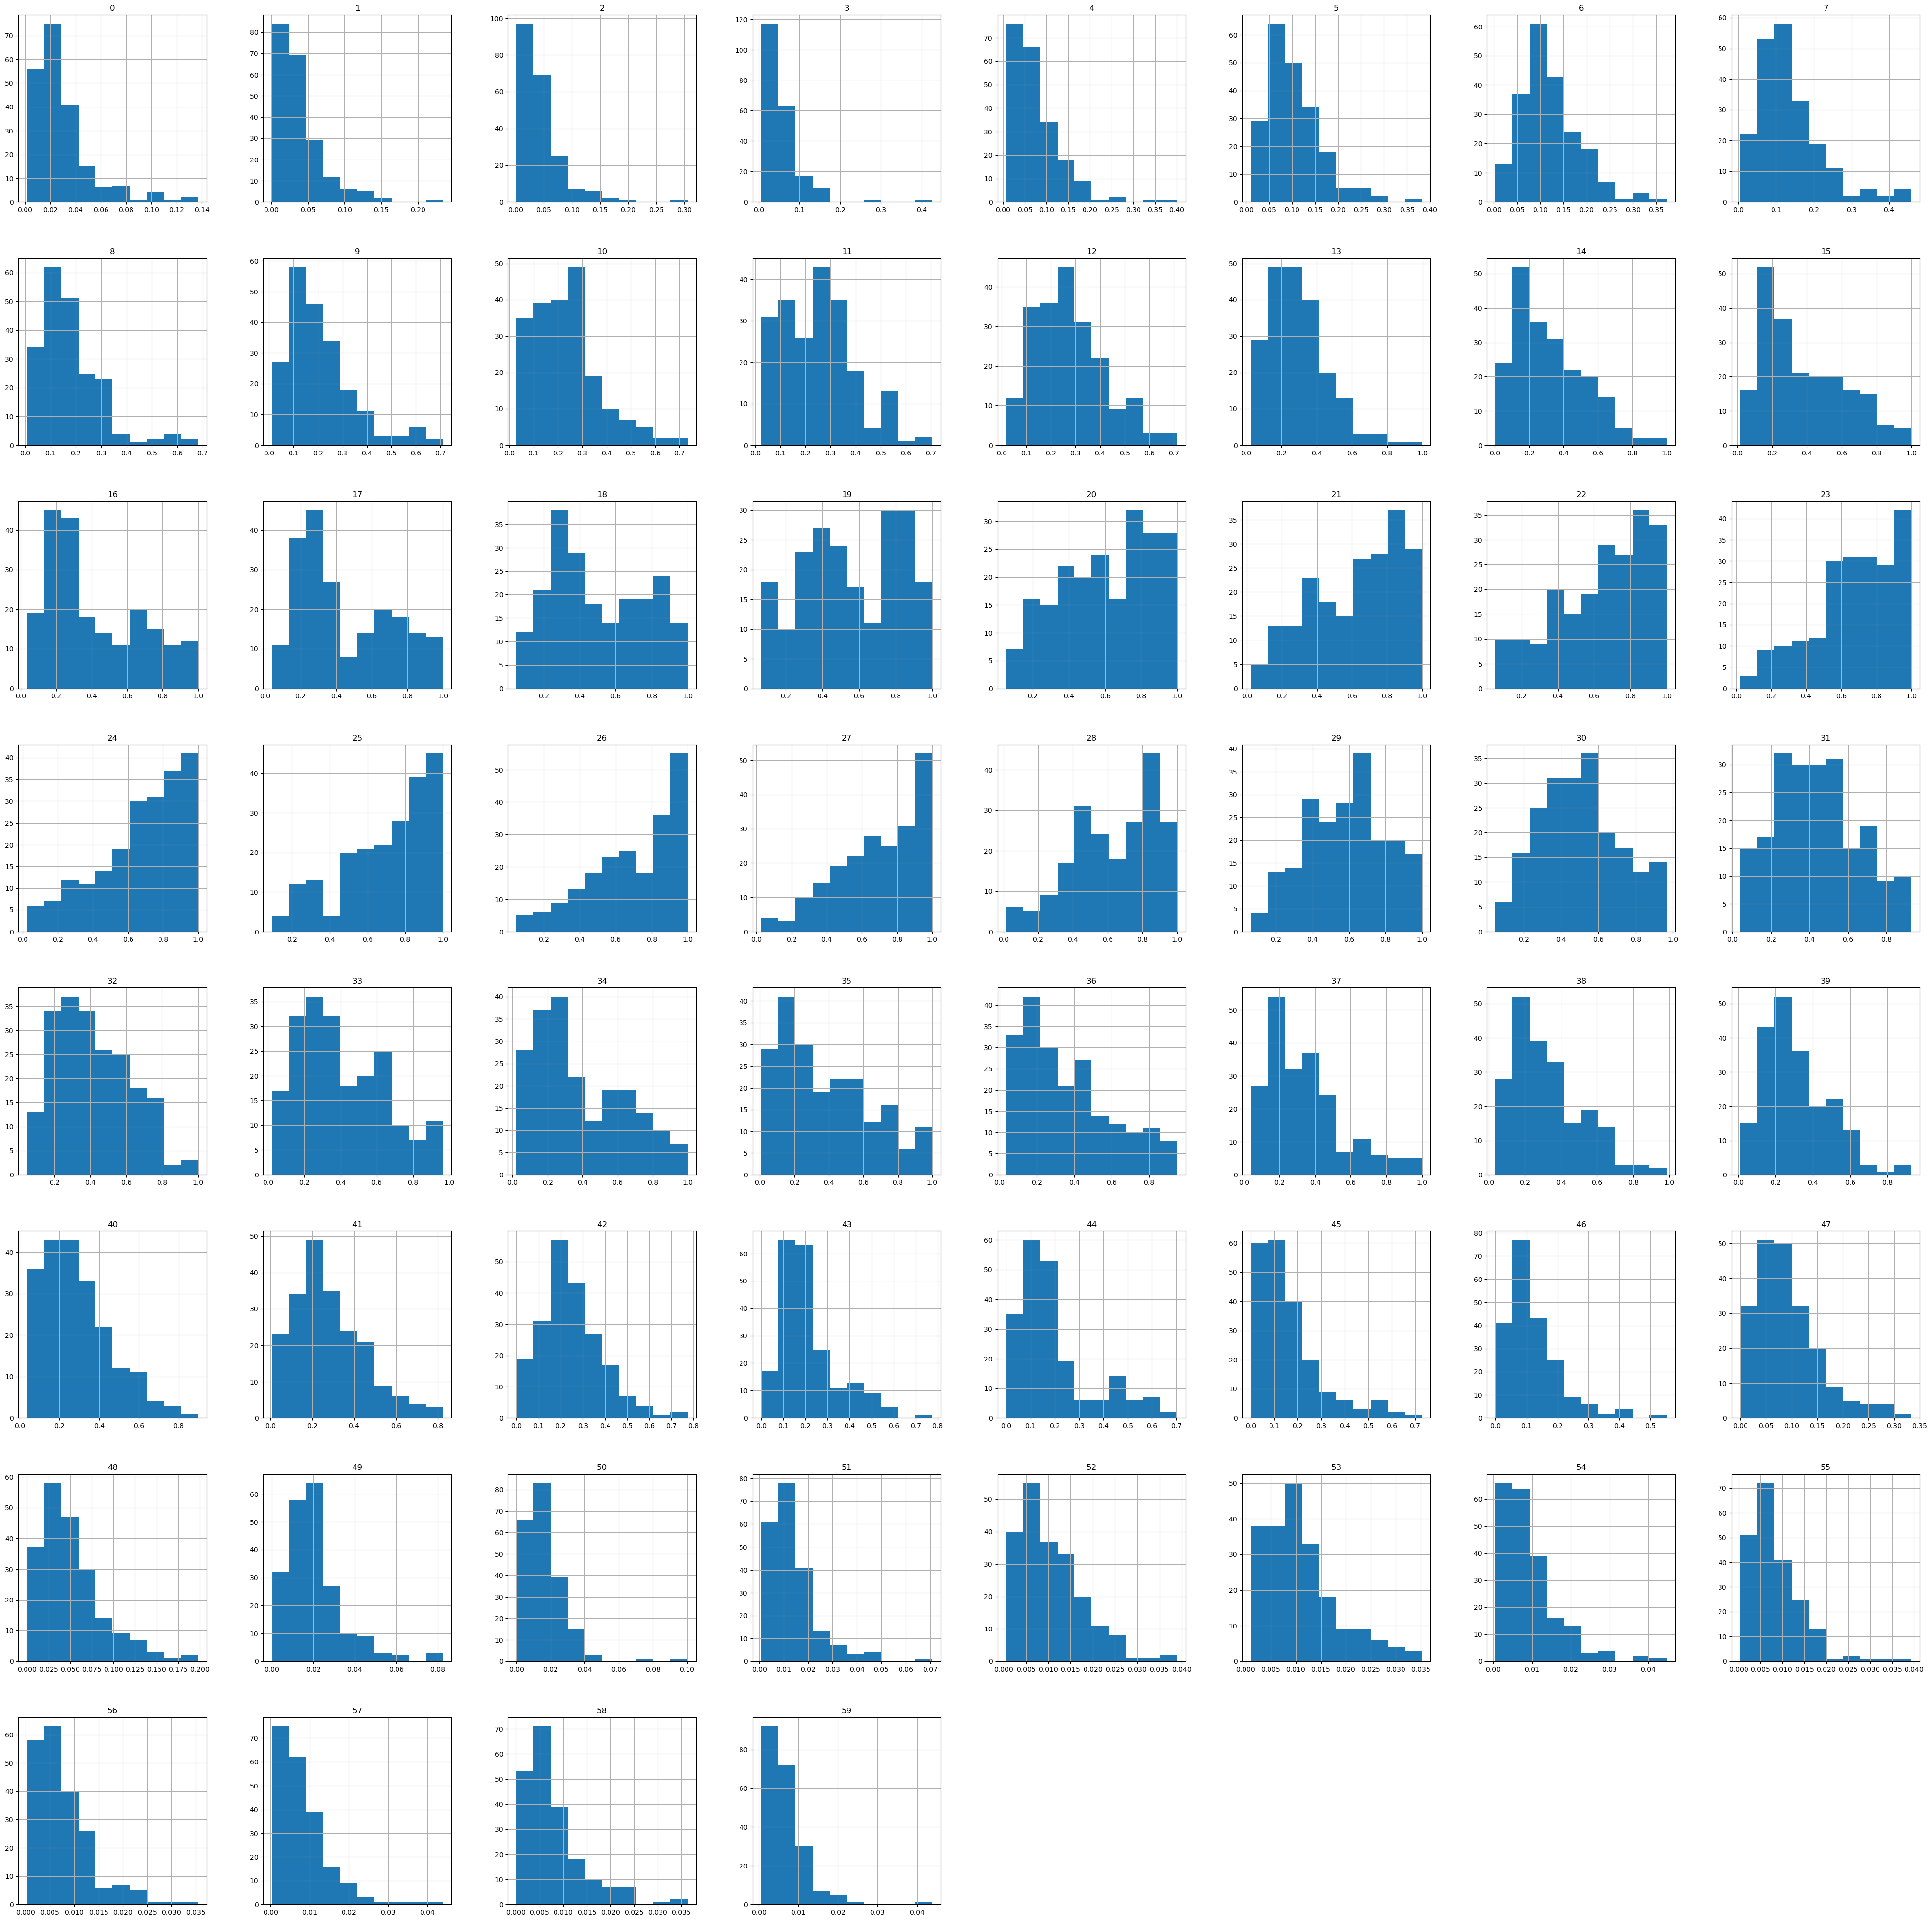

In [11]:
sonar_data.hist(figsize=(50, 50))
plt.show()

Findings: There are 61 columns in total. 60 columns are float format and 1 column is object.The first 60 columns are float and the last column is object. The values of the float are relatively small.

## Step 3: Preprocess the Data

I change column 60 from categorical variable to numerical variable. The reason is that Perceptron model requires numberical input data. 

### Change the categorical veriable into numerical variable

In [12]:
print(sonar_data[60])

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [13]:
# Split the data into features and labels

X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# Replace 'R' with -1 and 'M' with 1 in the y column
y = y.replace({'R': -1, 'M': 1})

print (y)

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64


In [14]:
# Combine the features and labels into a single DataFrame

sonar_data = pd.concat([X, y], axis=1)
print(sonar_data)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54   

In [15]:
# Descibe the whole dataset
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.067308
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,1.000139
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,-1.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,-1.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


Summary: I change the categorical variable into numerical variable and print the final result. From what what I have seen so far, the result is what I expected

## Step 4: Prepare the Training and Test Data Sets

Split the training and validation datasets into 80% and 20%. The dataset is small and I would like to make sure that there is enough training dataset to feed into the model.

### Scaling the dataset

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to data
scaler.fit(sonar_data)

# Transform data
sonar_data = scaler.transform(sonar_data)
print(sonar_data)

[[0.13643068 0.15645092 0.13567674 ... 0.24517906 0.06004619 0.        ]
 [0.32300885 0.22160309 0.27201051 ... 0.14049587 0.08775982 0.        ]
 [0.18215339 0.24689241 0.35611038 ... 0.25895317 0.16628176 0.        ]
 ...
 [0.37389381 0.18474068 0.05420499 ... 0.20936639 0.05773672 1.        ]
 [0.21238938 0.14873553 0.15604468 ... 0.09641873 0.09699769 1.        ]
 [0.18067847 0.15302186 0.03975033 ... 0.16528926 0.2517321  1.        ]]


### Split the dataset into 80% training dataset and 20% validation dataset.

In [17]:
from sklearn.model_selection import train_test_split
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.count())
print(X_test.count())

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

I split the training and validation dataset successfully and check the number of values in split and training datasets. The result looks good and it is what I expected.

## Step 5: Instantiate and Configure a Perceptron

I instantiate a 'Perceptron' object from 'sklearn.linear_model'

### Instantiate Perceptron

In [18]:

from sklearn.linear_model import Perceptron

# Replace this comment with your code.
perceptron = Perceptron(tol = None, random_state = 0, alpha = 0.001, max_iter = 100000, early_stopping = True)

# tol=None: The stopping criterion for the algorithm. If None, the algorithm will stop when the maximum number of iterations (max_iter) is reached.
# random_state=0: The seed for the random number generator used by the algorithm.
# alpha=0.001: The regularization parameter for the algorithm. This is the same as the learning rate in the case of gradient descent.
# max_iter=100000: The maximum number of iterations for the algorithm.
# early_stopping=True: Whether to use early stopping to prevent overfitting. If True, the algorithm will stop training when the validation score does not improve for tol consecutive iterations.


I instantiate a 'Perceptron' object with additional parameters, including tolerance, random state, alpha(learning rate), maximum number of iterations and early stopping.

## Step 6: Train the Perceptron

Fit the training dataset into the model

### Apply perceptron model on training datasets

In [19]:
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.001, early_stopping=True, max_iter=100000, tol=None)

After fit the training dataset into perceptron model, the model will learn the pattern of the datasets.

## Step 7: Test the Perceptron

Check out the training dataset accuracy in perceptron.


### Training accuracy

In [20]:
train_accuracy = perceptron.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy}")

Training accuracy: 0.9819277108433735


Check out the validation dataset accuracy in perceptron.

### Validation accuracy

In [21]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8095238095238095


From the training accuary is about 0.982 and validation accuracy is about 0.810. We could see that there still possible to improve the model accuracy.

## Step 8: Demonstrate Making Predictions

Replace this text with a prose description of what you will do in this section, and why you have chosen to do this. Demonstrate how you can use the perceptron to make new predictions.

### Validate the model with sample data

In [22]:
# Use the first record in the x training dataset as new record to test

X_new = X_train.iloc[0].to_numpy()
X_new = X_new.reshape(1, -1)
print(X_new)

[[0.0188 0.037  0.0953 0.0824 0.0249 0.0488 0.1424 0.1972 0.1873 0.1806
  0.2139 0.1523 0.1975 0.4844 0.7298 0.7807 0.7906 0.6122 0.42   0.2807
  0.5148 0.7569 0.8596 1.     0.8457 0.6797 0.6971 0.5843 0.4772 0.5201
  0.4241 0.1592 0.1668 0.0588 0.3967 0.7147 0.7319 0.3509 0.0589 0.269
  0.42   0.3874 0.244  0.2    0.2307 0.1886 0.196  0.1701 0.1366 0.0398
  0.0143 0.0093 0.0033 0.0113 0.003  0.0057 0.009  0.0057 0.0068 0.0024]]


In [23]:
# Use the perceptron model to predict the test result
y_new = perceptron.predict(X_new)
print(y_new)


[-1]


In [24]:
# Change to 2D array in the y training dataset
y_train_2d = y_train.iloc[0].reshape(1, -1)

In [25]:
# predict the predictions
y_new = perceptron.predict(X_new)
accuracy = accuracy_score(y_train_2d, y_new)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


I use one of the training dataset record to test the model accuracy and get accuracy = 1. The reason why the accuracy is pretty high is that the model learn the pattern of the training dataset, so it kind of "cheat" the model. Next step will be apply more new record to test the model accuracy. In that case, I also need to have more training datasets to approve my assumptions.

## Step 9: Evaluate (and Improve?)

Describe the configuration and performance of your classifier, and what the results mean. Is this a good classifier? Why isn't it better than what it is? What might you try next to improve it? How accurate can you make your classifier? If you have time, see if you can increase the accuracy. Can you beat 98%? 🙀

Based on the previous steps, I have implemented a Perceptron classifier to distinguish between rocks and mines based on sonar data. I have split the data into 80% training data and 20% validation data. And we have scaled the data to improve the performance of the classifier.

The configuration of the classifier is a Perceptron with 60 input features, using a learning rate of 0.001, and trained over 100000 epochs. We have achieved a training accuracy of around 98% and a validation accuracy is around 81% which is relatively reasonable but not perfect. 

One posssible reason why our classifier is not performing better is that the data may not be linearly separable. This means that there may not be a striaight line that can totally separate the rocks from the mine. In this case, perceptron may not be a right model to use.

Another possible reason is that the number of training and validation datasets is relatively small and it didn't provide enough dataset to fit into the model to allow model learn the pattern of the datasets. 

To improve the performance of the classifier, we could try using a more complex model, such as a multiplayer perceptron (MLP) or a support vector machine (SLM), which can handle non-liner decision boundaries. But it will depend on further experiment.

As for the challenge of achieving 98% accuracy, it is unlikely that we will be able to achieve by using current model and datasets. But it is possible when when try different model and have more datasets to test our result.



## Conclusion

Give us a quick recap of what you've done here in **Part 2**. Mention _three_ things that were most notable in this process, whether it's related to exploration, preprocessing, configuring, training, or evaluating. If you put in the effort to try to improve the perceptron, describe what you did and what let you to try what you did, and describe the results. Conclude with some questions about the problem or what you might do next to increase the performance of your classifier.

I used a perceptron model to predict what classification between rocks and mines based on solar data. 
In conclusion, the most notable in this process:

1) Exploration: sonar_data.describe() help me better understand the dataset in statistical way. \
2) Instantiate Perceptron: First I use Perceptron(alpha = 0.01, max_iter = 100000, early_stopping = True), the training accuracy is about 78%. After I did some reseach,one step I did: I change to Perceptron(tol = None, random_state = 0, alpha = 0.001, max_iter = 100000, early_stopping = True). I tried smaller alpha and alpha means a hyperparamer that controls the step size at a each iteration while moving toward a set of weights that will correctly classify the training examples.\
3) Scaling the datasets: After I got 78% training accuracy, I go back the dataset to scale the data. I used the 'MinMaxScaler' from Scilit-learn. It scales the features of the data to a range between 0 and 1 based on the min and max values. It helps improve the model accuracy as well.

Finally, after I applied all the change, the model accuracy has been improved significantly, the training accuracy is 98%, the validation accuracy is 81%. For next step, I will try different model like muptiplayer perceptron (MLP) or a support vector machine (SLM). Also, I will try large datasets to improve the model accuracy.
